# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

In [99]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)
print(X.shape)
print(y.shape)

(150, 2)
(150,)


Text(0, 0.5, 'Petal Width')

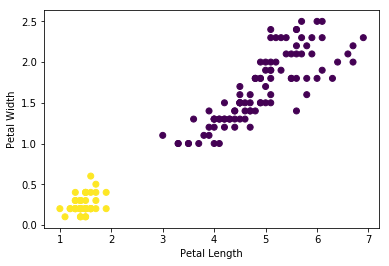

In [100]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

The scatterplot shows an evident space for a choice boundary.


Data is sorted, so lets shuffle it a bit.

In [101]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Mashing x and y together for the train and test sets
training_data = np.insert(X_train, len(X_train[0]), y_train, axis=1)
testing_data = np.insert(X_test, len(X_test[0]), y_test, axis=1)

In [102]:
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i+1]*row[i]
  return 1.0 if (activation >= 0) else 0.0

In [103]:
def train(data, eta=0.1, n=20):
  w = [0.0 for i in range(len(data[0]))]
  errors = []
  for epoch in range(n):
    sum_error = 0
    for row in data:
      prediction = predict(row, w)
      error = row[-1] - prediction
      w[0] += eta * error
      for i in range(len(row)-1):
        w[i+1] += eta * error * row[i]
        
      sum_error += error**2
    errors.append(sum_error)
   
  return w, errors

In [104]:
#Running training algorithm
#we randomize initial weights and run the training algorithm
weights, errors = train(training_data)

Text(0, 0.5, 'Error')

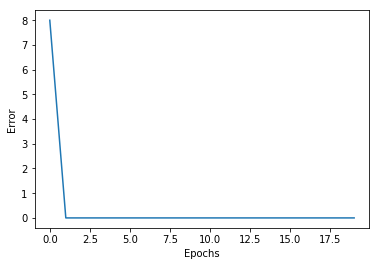

In [105]:
#Error Plot shows early convergence
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")

In [106]:
#Final Weights vector
weights

[0.4, -0.09, -0.18999999999999995]

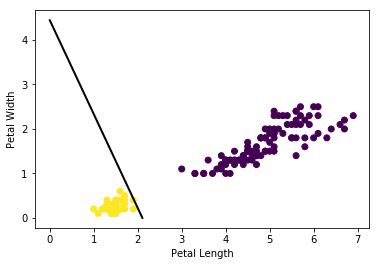

In [107]:
#we now come back to the scatterplot and apply the weights vector to plot the decision boundary
plt.plot([0,-weights[0]/weights[2]], [-weights[0]/weights[1], 0], 'k-', lw=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [108]:
#Now let's run the test with sklearn
clf = Perceptron()
clf.fit(X, y)
func = clf.decision_function(X)


C:\Users\Sebastian\scoop\apps\anaconda3\current\envs\datascience\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


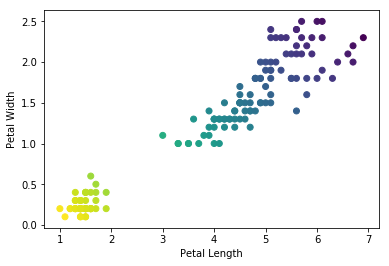

In [109]:
#Sklearn provides a superior model with non-binary classifiers giving their proximity to the boundary
plt.scatter(X[:,0], X[:,1], c=func, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [110]:
#An accuracy metric
def accuracy(predicted, actual):
  correct = 0
  for i in range(len(predicted)):
    if predicted[i] == actual[i]:
      correct += 1
  return (correct/float(len(predicted)))*100

In [111]:
#We now run a prediction of the test data
predicted = []
for i in range(len(X_test)):
  predicted.append(predict(testing_data[i], weights))

Accuracy: 100.0 %


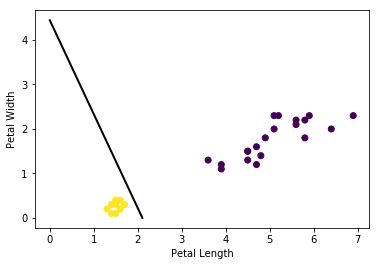

In [112]:
print("Accuracy:", accuracy(predicted, y_test), "%")

#A scatterplot showing predicted labels for tested samples
plt.plot([0,-weights[0]/weights[2]], [-weights[0]/weights[1], 0], 'k-', lw=2)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted, cmap='viridis')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

Given the binary structure of this problem and contained label clusters this model will hit 100% accuracy. With less trivial problem error rate would shoot up accordingly.